### Crypto Challenge - Correlations

#### Correlations b/w various crypto instruments (Binance)
* Retrieve historic data from Binance using their API
* Historic = most recent 30 days
* Data = daily price data of various perpetual swap instruments
* Instruments = perpetual swaps / on Binance USD-Margined derivatives exchange ("USDS-M"):
    * BTC/USDT
    * ETH/USDT
    * XRP/USDT
    * ADA/USDT
    * SOL/USDT
* Refer below for more instructions

#### Info on USDS-M contracts:
* Settlement in USD-pegged assets: contracts are denominated and settled in USDT or BUSD.
* Expiration: Perpetual and Quarterly.
* Clear pricing rules: each futures contract specifies the base asset's quantity delivered for a single contract, also known as "Contract Unit". For instance, BTC/USDT, ETH/USDT, and BCH/USDT futures contracts represent only one unit of its respective base asset, similar to spot markets.
* (Source: https://www.binance.com/en/support/faq/85eac2bba0b342819122dc9bd4745e9b)

* USDS-M Futures Contract Specifications: (https://www.binance.com/en/support/faq/360033161972)

* Advantages of USDS-M contracts:

* USDⓈ-Margined contracts are linear futures quoted and settled in USDT or BUSD. One of the key benefits of USDT or BUSD settlement is that you can easily calculate your returns in fiat. This makes USDⓈ-Margined contracts more intuitive. For example, when you make 500 BUSD in profit, you can easily estimate that the profit is worth approximately $500 - since the value of 1 BUSD is pegged closely to 1 USD.
Additionally, a universal settlement currency, such as BUSD or USDT, provides more flexibility. You can use the same settlement currency across various futures contracts (i.e., BTC, ETH, XRP, etc.). This eliminates the need to buy the underlying coins to fund futures positions. As such, you will not incur excessive fees as there is no additional conversion required when trading with USDT.
In periods of high volatility, USDⓈ-Margined contracts can help reduce the risk of large price swings. Thus, you do not need to worry about hedging their underlying collateral exposure.

* Price Index of USDS-M Contracts:
* The underlying contract for the Perpetual Contract is the ‘true’ value of the Contract, and an average of the prices on the major markets constitutes the “Price Index” which is the primary component of Mark Price.
The Price Index is a bucket of prices from the major Spot Market Exchanges. The Price Index for USDⓈ-M futures contracts derives prices from Huobi, Okex, Bittrex, HitBTC, Gate.io, Bitmax, Poloniex, FTX, MXC. (Source: https://www.binance.com/en/support/faq/547ba48141474ab3bddc5d7898f97928)

#### Code Documentation
* Binance API docs: (https://binance-docs.github.io/)
* Python-Binance library docs: (https://python-binance.readthedocs.io/)

#### Troubleshooting
* Dev forums: (https://dev.binance.vision)
* 

##### Commenced python-binance SDK library, due to time contraints, continued to interact directly with Binance APIs.

In [511]:
# Install/import dependencies

import json
import requests
# from api_keys import exchange_api_key1, exchange_api_key2
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
# python-binance package install


In [512]:
# Import initialise exchange api keys
from api_keys import exchange_api_key1, exchange_api_key2

In [513]:
# Install crypto/finance specific dependencies
# ! pip install python-binance

In [514]:
# Import crypto/finance dependencies
# from binance import Client

In [515]:
# Authenticate exchange API keys to python client (using Binance-Python)
# Setup client
# client = Client(exchange_api_key1, exchange_api_key2)

In [516]:
# tickers = client.get_all_tickers()
# tickers

In [517]:
# Checking rate limits
# client.get_exchange_info()


In [518]:
# price_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY,'13 Sep 2022')
# price_data

In [519]:
# client.get_historical_klines_generator??

# client.get_continuousklines??

# client.futures_continous_klines('BTCUSDT')
#https://fapi.binance.com/fapi/v1/continuousKlines?pair=BTCUSDT&contractType=PERPETUAL

In [520]:
# base_url = 

In [521]:
# btcfutures = client.get_historical_klines(symbol='BTCUSDT',
#                                           type= 'USD_M_Futures',
#                                           interval=Client.KLINE_INTERVAL_1DAY,
#                                           start_str= '',)

In [522]:
# client.get_continuous_kline()

### Perform API Calls
* Binance API docs:
https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data
* Response:

* 1607444700000,          // Open time
* "18879.99",             // Open
* "18900.00",             // High
* "18878.98",             // Low
* "18896.13",             // Close (or latest price)
* "492.363",              // Volume
* 1607444759999,          // Close time
* "9302145.66080",        // Quote asset volume
* 1874,                   // Number of trades
* "385.983",              // Taker buy volume
* "7292402.33267",        // Taker buy quote asset volume
* "0"                     // Ignore

In [523]:

#FAPI docs Binance USDS-M Futures
# Link: (https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data)

# Base binance url for calling API
base_url = "https://fapi.binance.com"          # end point for USDS-M
event = "/fapi/v1/continuousKlines"            # Continuous contract Kline
pair_btcusdt = "BTCUSDT"                       # string, mandatory
contractType = 'PERPETUAL'                     # enum, mandatory
interval = '2h'                                # enum, mandatory
limit = 360 + 1                                # 30days x 2hrly + 1 extra for droping due to pct calc NaN

# # Params for additional data
pair_ethusdt = "ETHUSDT"
pair_xrpusdt = "XRPUSDT"
pair_adausdt = "ADAUSDT"
pair_solusdt = "SOLUSDT"


# Build various query URLs
query_url_btcusdt = f"{base_url}{event}?pair={pair_btcusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_ethusdt = f"{base_url}{event}?pair={pair_ethusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_xrpusdt = f"{base_url}{event}?pair={pair_xrpusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_adausdt = f"{base_url}{event}?pair={pair_adausdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_solusdt = f"{base_url}{event}?pair={pair_solusdt}&contractType={contractType}&interval={interval}&limit={limit}"

# Timestamp execution (UTC)
executed_utc = str(pd.Timestamp.utcnow())

query_url_ethusdt


'https://fapi.binance.com/fapi/v1/continuousKlines?pair=ETHUSDT&contractType=PERPETUAL&interval=2h&limit=361'

In [524]:
# Loop query_url customising for each pair. 
# This code would be required to scale exercise.

# for pair in pairs:
#     try:
#         # Retrieve "continuousKlines" for perps
#         query_url = f"{base_url}{event}?pair={pair}&contractType={contractType}&interval={interval}"
#         response = requests.get(query_url).json()
#         f'{pair}_raw_df' = pd.DataFrame(response)

In [525]:
response_btcusdt = requests.get(query_url_btcusdt).json()
response_ethusdt = requests.get(query_url_ethusdt).json()
response_xrpusdt = requests.get(query_url_xrpusdt).json()
response_adausdt = requests.get(query_url_adausdt).json()
response_solusdt = requests.get(query_url_solusdt).json()
# response_solusdt

In [526]:
## Convert retrieved json > Pandas dataframe

btcusdt_raw_df = pd.DataFrame(response_btcusdt)
ethusdt_raw_df = pd.DataFrame(response_ethusdt)
xrpusdt_raw_df = pd.DataFrame(response_xrpusdt)
adausdt_raw_df = pd.DataFrame(response_adausdt)
solusdt_raw_df = pd.DataFrame(response_solusdt)
# btcusdt_raw_df


In [527]:
## Save image of raw data df

# solusdt_raw_df

raw_data = solusdt_raw_df.head()

# Saving image of raw_data
import dataframe_image as dfi

dfi.export(raw_data, "Images/Eg_raw_data.png")

In [528]:
## Rename columns of df, based on response dictionary,

# from (https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data):
#     1607444700000,          // Open time
#     "18879.99",             // Open
#     "18900.00",             // High
#     "18878.98",             // Low
#     "18896.13",             // Close (or latest price)
#     "492.363",              // Volume
#     1607444759999,          // Close time
#     "9302145.66080",        // Quote asset volume
#     1874,                   // Number of trades
#     "385.983",              // Taker buy volume
#     "7292402.33267",        // Taker buy quote asset volume
#     "0"                     // Ignore.

btcusdt_raw_df.columns = ["Open_time", "Open_BTC", "High_BTC", "Low_BTC", "Close_BTC",
                          "Volume", "Close_time_BTC", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
ethusdt_raw_df.columns = ["Open_time", "Open_ETH", "High_ETH", "Low_BTC", "Close_ETH",
                          "Volume", "Close_time_ETH", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
xrpusdt_raw_df.columns = ["Open_time", "Open_XRP", "High_XRP", "Low_XRP", "Close_XRP",
                          "Volume", "Close_time_XRP", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
adausdt_raw_df.columns = ["Open_time", "Open_ADA", "High_ADA", "Low_ADA", "Close_ADA",
                          "Volume", "Close_time_ADA", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
solusdt_raw_df.columns = ["Open_time", "Open_SOL", "High_SOL", "Low_SOL", "Close_SOL",
                          "Volume", "Close_time_SOL", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]

In [529]:
## Check len of response
# print(solusdt_raw_df.head())
btcusdt_raw_df.shape

# print(f'There are 500 data points per pair (proof: btcusdt_raw_df.shape). I have a limit of 500 responses.')
# print(f'30 days x 24 hrs = 720hrs. Rolling last 720hr required, 1.44hr intervals returns 500 data points.')
# print(f'Rounding up to intervals of 2hrs, for max datapoints that cover last 720 hrs (30days)')

(361, 12)

In [530]:
# Check data type of DFs
solusdt_raw_df.dtypes

Open_time                        int64
Open_SOL                        object
High_SOL                        object
Low_SOL                         object
Close_SOL                       object
Volume                          object
Close_time_SOL                   int64
Quote_asset_volume              object
Number_of_trades                 int64
Taker_buy_volume                object
Taker_buy_quote_asset_volume    object
Ignore                          object
dtype: object

In [531]:
# Convert Open/close times to datetime
btcusdt_raw_df["Open_time"] = pd.to_datetime(btcusdt_raw_df["Open_time"]/1000, unit='s')
btcusdt_raw_df["Close_time_BTC"] = pd.to_datetime(btcusdt_raw_df["Close_time_BTC"]/1000, unit='s')

ethusdt_raw_df["Open_time"] = pd.to_datetime(ethusdt_raw_df["Open_time"]/1000, unit='s')
ethusdt_raw_df["Close_time_ETH"] = pd.to_datetime(ethusdt_raw_df["Close_time_ETH"]/1000, unit='s')

xrpusdt_raw_df["Open_time"] = pd.to_datetime(xrpusdt_raw_df["Open_time"]/1000, unit='s')
xrpusdt_raw_df["Close_time_XRP"] = pd.to_datetime(xrpusdt_raw_df["Close_time_XRP"]/1000, unit='s')

adausdt_raw_df["Open_time"] = pd.to_datetime(adausdt_raw_df["Open_time"]/1000, unit='s')
adausdt_raw_df["Close_time_ADA"] = pd.to_datetime(adausdt_raw_df["Close_time_ADA"]/1000, unit='s')

solusdt_raw_df["Open_time"] = pd.to_datetime(solusdt_raw_df["Open_time"]/1000, unit='s')
solusdt_raw_df["Close_time_SOL"] = pd.to_datetime(solusdt_raw_df["Close_time_SOL"]/1000, unit='s')

In [532]:
# Check head and tail of DFs. 
# As API returns data in ascending (head = nth itme), (tail = more recent interval)
print(xrpusdt_raw_df.tail())
print(adausdt_raw_df.head())

              Open_time Open_XRP High_XRP Low_XRP Close_XRP      Volume  \
356 2022-09-15 20:00:00   0.3292   0.3301  0.3273    0.3276  29660266.4   
357 2022-09-15 22:00:00   0.3277   0.3278  0.3239    0.3260  58585173.0   
358 2022-09-16 00:00:00   0.3260   0.3277  0.3232    0.3242  75306140.4   
359 2022-09-16 02:00:00   0.3242   0.3269  0.3211    0.3267  59774342.5   
360 2022-09-16 04:00:00   0.3267   0.3291  0.3265    0.3278  33082635.8   

                   Close_time_XRP Quote_asset_volume  Number_of_trades  \
356 2022-09-15 21:59:59.999000064      9758076.78593             19115   
357 2022-09-15 23:59:59.999000064     19098306.35365             27772   
358 2022-09-16 01:59:59.999000064     24511943.15994             34059   
359 2022-09-16 03:59:59.999000064     19364853.50738             30602   
360 2022-09-16 05:59:59.999000064     10849015.62727             16868   

    Taker_buy_volume Taker_buy_quote_asset_volume Ignore  
356       12787454.3                4208648.3

In [533]:
## Drop redundant columns

# btcusdt_df = btcusdt_raw_df[["Open_time_BTC","Open_BTC","High_BTC","Low_BTC","Close_BTC","Close_time_BTC"]]
# ethusdt_df = ethusdt_raw_df[["Open_time_ETH","Open_ETH","High_ETH","Low_ETH","Close_ETH","Close_time_ETH"]]
# xrpusdt_df = xrpusdt_raw_df[["Open_time_XRP","Open_XRP","High_XRP","Low_XRP","Close_XRP","Close_time_XRP"]]
# adausdt_df = adausdt_raw_df[["Open_time_ADA","Open_ADA","High_ADA","Low_ADA","Close_ADA","Close_time_ADA"]]
# solusdt_df = solusdt_raw_df[["Open_time_SOL","Open_SOL","High_SOL","Low_SOL","Close_SOL","Close_time_SOL"]]

btcusdt_df = btcusdt_raw_df[["Open_time","Open_BTC"]]
ethusdt_df = ethusdt_raw_df[["Open_time","Open_ETH"]]
xrpusdt_df = xrpusdt_raw_df[["Open_time","Open_XRP"]]
adausdt_df = adausdt_raw_df[["Open_time","Open_ADA"]]
solusdt_df = solusdt_raw_df[["Open_time","Open_SOL"]]

In [534]:
# Check new DFs
solusdt_df

,Open_time,Open_SOL
0,2022-08-17 04:00:00,43.9800
1,2022-08-17 06:00:00,44.3400
2,2022-08-17 08:00:00,43.1200
3,2022-08-17 10:00:00,43.0900
4,2022-08-17 12:00:00,42.7500
...,...,...
356,2022-09-15 20:00:00,33.4000
357,2022-09-15 22:00:00,33.2700
358,2022-09-16 00:00:00,33.0600
359,2022-09-16 02:00:00,32.9600


In [535]:
# Merge DFs into 1
# By merging on "Open_time", ensuring prices of all assets are matched on time.
# Allows for correct calculation of correlations
btc_eth_df = pd.merge(btcusdt_df, ethusdt_df, on="Open_time")
btc_eth_xrp_df = pd.merge(btc_eth_df, xrpusdt_df, on="Open_time")
btc_eth_xrp_ada_df = pd.merge(btc_eth_xrp_df, adausdt_df, on="Open_time")
btc_eth_xrp_ada_sol_df = pd.merge(btc_eth_xrp_ada_df, solusdt_df, on="Open_time")

btc_eth_xrp_ada_sol_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL
0,2022-08-17 04:00:00,23997.00,1895.43,0.3869,0.57760,43.9800
1,2022-08-17 06:00:00,24151.10,1923.47,0.3872,0.57680,44.3400
2,2022-08-17 08:00:00,23774.20,1889.45,0.3771,0.55640,43.1200
3,2022-08-17 10:00:00,23817.90,1889.08,0.3779,0.55950,43.0900
4,2022-08-17 12:00:00,23737.10,1875.89,0.3771,0.55500,42.7500
...,...,...,...,...,...,...
356,2022-09-15 20:00:00,19774.90,1496.66,0.3292,0.46760,33.4000
357,2022-09-15 22:00:00,19818.20,1489.59,0.3277,0.46630,33.2700
358,2022-09-16 00:00:00,19690.80,1471.94,0.3260,0.46570,33.0600
359,2022-09-16 02:00:00,19721.40,1470.78,0.3242,0.46660,32.9600


In [536]:
## Convert object columns to floats, in prep for calculations
# Specify columns to be converted to float/numberic
float_columns = ["Open_BTC","Open_ETH","Open_XRP","Open_ADA","Open_SOL"]

# .astype(float), didn't convert objects
# btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].astype(float)
btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].apply(pd.to_numeric, axis=1)

In [537]:
# Add percentage change, calc'd on open price. For each interval

btc_eth_xrp_ada_sol_df['pct_BTC'] = btc_eth_xrp_ada_sol_df['Open_BTC'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ETH'] = btc_eth_xrp_ada_sol_df['Open_ETH'].pct_change()
btc_eth_xrp_ada_sol_df['pct_XRP'] = btc_eth_xrp_ada_sol_df['Open_XRP'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ADA'] = btc_eth_xrp_ada_sol_df['Open_ADA'].pct_change()
btc_eth_xrp_ada_sol_df['pct_SOL'] = btc_eth_xrp_ada_sol_df['Open_SOL'].pct_change()

In [538]:
# Check calcs
# btc_eth_xrp_ada_sol_df

In [539]:
# Drop 1st data point, pct is NaN
BEXAS_df = btc_eth_xrp_ada_sol_df.dropna()
BEXAS_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL,pct_BTC,pct_ETH,pct_XRP,pct_ADA,pct_SOL
1,2022-08-17 06:00:00,24151.1,1923.47,0.3872,0.5768,44.34,0.006422,0.014793,0.000775,-0.001385,0.008186
2,2022-08-17 08:00:00,23774.2,1889.45,0.3771,0.5564,43.12,-0.015606,-0.017687,-0.026085,-0.035368,-0.027515
3,2022-08-17 10:00:00,23817.9,1889.08,0.3779,0.5595,43.09,0.001838,-0.000196,0.002121,0.005572,-0.000696
4,2022-08-17 12:00:00,23737.1,1875.89,0.3771,0.5550,42.75,-0.003392,-0.006982,-0.002117,-0.008043,-0.007890
5,2022-08-17 14:00:00,23416.2,1833.59,0.3700,0.5344,41.37,-0.013519,-0.022549,-0.018828,-0.037117,-0.032281
...,...,...,...,...,...,...,...,...,...,...,...
356,2022-09-15 20:00:00,19774.9,1496.66,0.3292,0.4676,33.40,-0.002296,-0.006901,0.004577,-0.001708,0.000000
357,2022-09-15 22:00:00,19818.2,1489.59,0.3277,0.4663,33.27,0.002190,-0.004724,-0.004557,-0.002780,-0.003892
358,2022-09-16 00:00:00,19690.8,1471.94,0.3260,0.4657,33.06,-0.006428,-0.011849,-0.005188,-0.001287,-0.006312
359,2022-09-16 02:00:00,19721.4,1470.78,0.3242,0.4666,32.96,0.001554,-0.000788,-0.005521,0.001933,-0.003025


In [540]:
## Check objects converted to numeric

# btc_eth_xrp_ada_sol_df.info()
# btc_eth_xrp_ada_sol_df.drypes
# btc_eth_xrp_ada_sol_df.describe()
BEXAS_df.describe(include='datetime64[ns]')

c:\Users\Steve\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Open_time
count,360
unique,360
top,2022-08-17 06:00:00
freq,1
first,2022-08-17 06:00:00
last,2022-09-16 04:00:00


In [543]:
# Obtain first and last open_time
earliest = str(min(BEXAS_df["Open_time"]))
latest = str(max(BEXAS_df["Open_time"]))
print(earliest)
print(latest)

2022-08-17 06:00:00
2022-09-16 04:00:00


## Linear Regression

In [544]:
# Define a function for linear regression



# Dict to store each pairs data
pairs_correlation = {"Pair":[],"r-value":[],"beta":[]}


def linear_regression(x_value, y_value, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress = x_value * slope + intercept
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_value, y_value, edgecolor="black", marker="o")
    plt.title(f"{x_label}:{y_label} (USDS-M Perp) lin regress (rolling 30d)")
    plt.plot(x_value, regress, "r-")
    plt.annotate(line_eq, (0, -0.04), fontsize =12, color ="red")
    plt.xlabel(f"{x_label} % chg")
    plt.ylabel(f"{y_label} % chg")
    plt.grid(True)
    print(f"The r-value is:{rvalue}") 
    print(f"The beta is:{slope}")
    plt.savefig(f"Images/{x_label}_{y_label}_scatter.png")
    
    pairs_correlation["Pair"].append(f"{x_label}:{y_label}")
    pairs_correlation["r-value"].append(rvalue)
    pairs_correlation["beta"].append(slope)

#### BTCUSDT vs. ETHUSDT Plot & Linear Regression

The r-value is:0.8549430937924968
The beta is:1.304071704281848


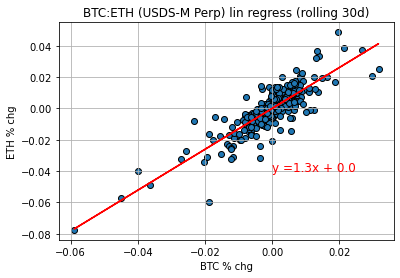

In [545]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ETH"]

x_label = "BTC"
y_label = "ETH"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. XRPUSDT Plot

The r-value is:0.7256017084659386
The beta is:0.7665773947683627


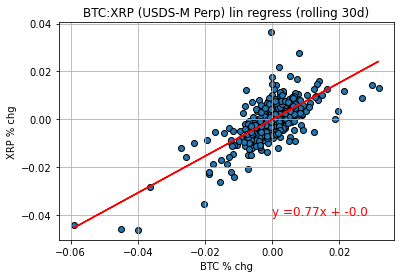

In [546]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_XRP"]

x_label = "BTC"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. ADAUSDT Plot

The r-value is:0.7566111341841911
The beta is:1.0079788687394884


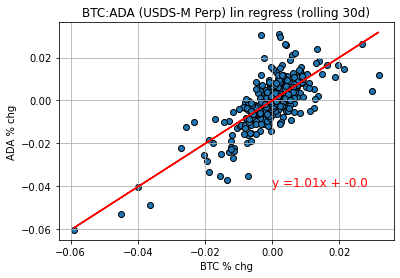

In [547]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ADA"]

x_label = "BTC"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. SOLUSDT Plot

The r-value is:0.8063852257779244
The beta is:1.3009281299195516


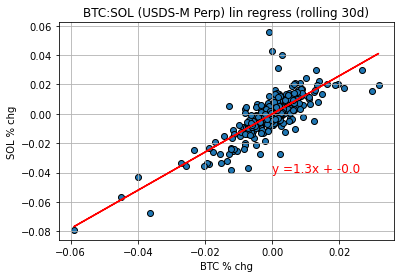

In [548]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_SOL"]

x_label = "BTC"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. XRPUSDT Plot

The r-value is:0.7128779271656138
The beta is:0.4937517141725347


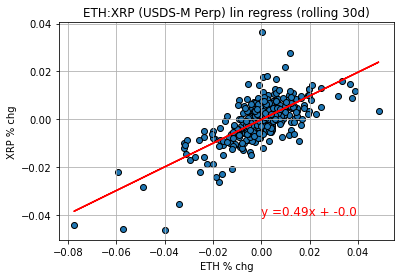

In [549]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_XRP"]

x_label = "ETH"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. ADAUSDT Plot

The r-value is:0.7818687841190807
The beta is:0.6828861596551747


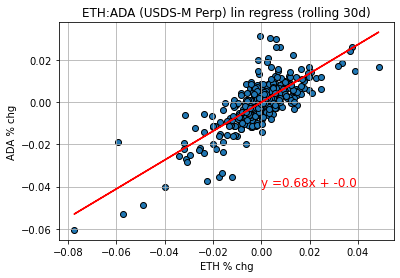

In [550]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_ADA"]

x_label = "ETH"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. SOLUSDT Plot

The r-value is:0.816688643880882
The beta is:0.863779704869913


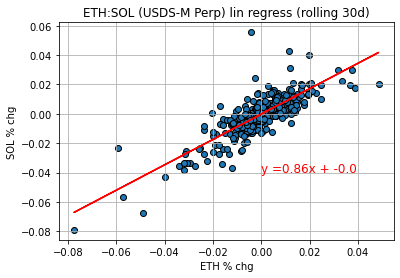

In [551]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ETH"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. ADAUSDT Plot

The r-value is:0.7375857252743646
The beta is:0.9301082379819703


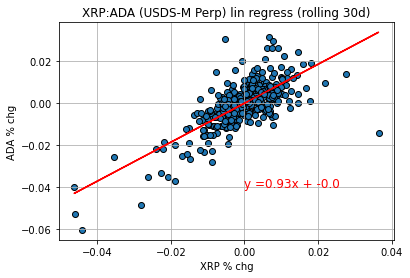

In [552]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_ADA"]

x_label = "XRP"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. SOLUSDT Plot

The r-value is:0.7084182697509654
The beta is:1.0817895538159426


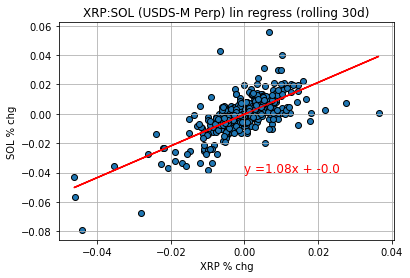

In [553]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_SOL"]

x_label = "XRP"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ADAUSDT vs. SOLUSDT Plot

The r-value is:0.8028785555100749
The beta is:0.9722588408802243


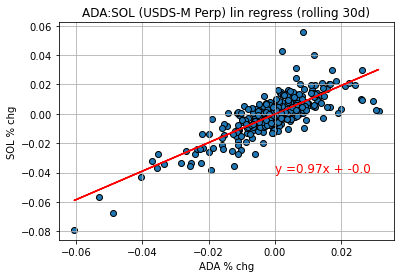

In [554]:
# Lin regress
x_value = BEXAS_df["pct_ADA"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ADA"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

In [555]:
## Display correlations (descending order)

# Convert dict to df
correlations_df = pd.DataFrame(pairs_correlation).sort_values("r-value", ascending=False)
correlations_df["Earliest_interval"] = earliest
correlations_df["Latest_interval"] = latest
correlations_df["API_queried_UTC"] = executed_utc
print(f"Correlations of Binance USDS-M Perps (30d rolling)")
correlations_df

Correlations of Binance USDS-M Perps (30d rolling)


,Pair,r-value,beta,Earliest_interval,Latest_interval,API_queried_UTC
0,BTC:ETH,0.854943,1.304072,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
6,ETH:SOL,0.816689,0.863780,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
3,BTC:SOL,0.806385,1.300928,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
9,ADA:SOL,0.802879,0.972259,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
5,ETH:ADA,0.781869,0.682886,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
2,BTC:ADA,0.756611,1.007979,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
7,XRP:ADA,0.737586,0.930108,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
1,BTC:XRP,0.725602,0.766577,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
4,ETH:XRP,0.712878,0.493752,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00
8,XRP:SOL,0.708418,1.081790,2022-08-17 06:00:00,2022-09-16 04:00:00,2022-09-16 05:15:42.400065+00:00


In [556]:
# ! pip install dataframe_image
import dataframe_image as dfi

correlations_styled_df = correlations_df.style.background_gradient()
dfi.export(correlations_styled_df, "Images/Correlations_descending.png")